Time (in secs):  12.8
Frequency (in Hz): 0.07812 




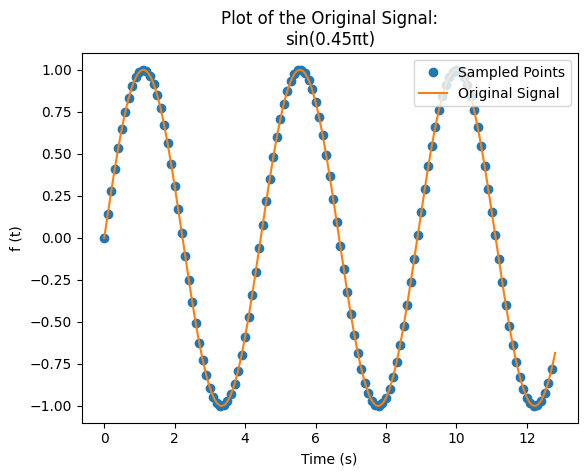

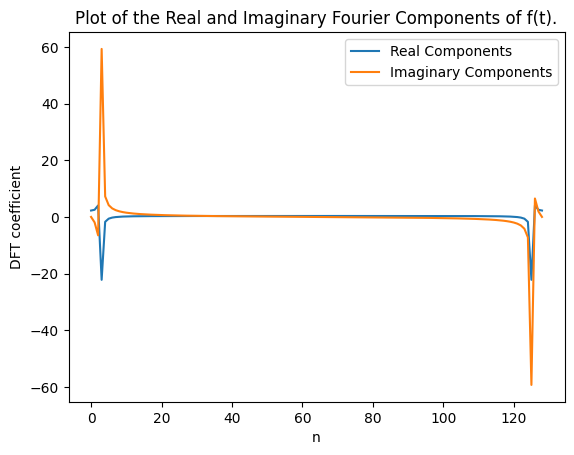

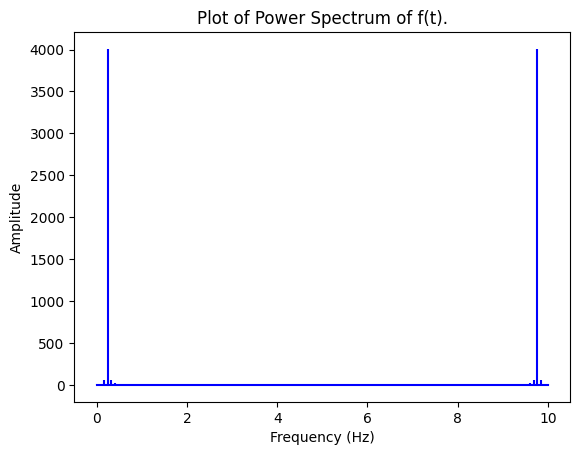

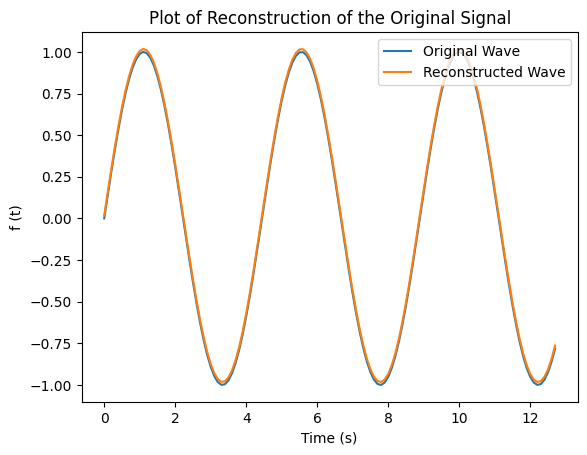

In [1]:
#f(t) = sin(0.45πt)

import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.fft import fft, ifft

def function(t): #f(t) = sin(0.45πt)
    return np.sin(0.45*math.pi*t)

#this function undergoes the "signal reconstruction" process. Using Eq (26) from lab manual
def reconstruction(Re_list, Im_list, m, n, time_sampling):
    signal = []
    for i in m:
        r = 0
        for j in n:
            r = r + (1/N*(Re_list[j] * math.cos((2*math.pi*j*i)/N) + Im_list[j] * math.sin((2*math.pi*j*i)/N))) #Eq (26) summation
        signal.append(r)
    return(signal)

#initializing parameters and lists
N = 128
h = 0.1
tau = N*h
n = np.arange(0,N+1,1)
m = np.arange(0,N,1)
time_sampling = np.arange(0, tau, h)
time_proper = np.linspace(0,tau,1000)
Re_list = []
Im_list = []

#prints the period and frequency based on given N and h
print('Time (in secs): ', tau)
print('Frequency (in Hz): %0.5f \n\n'%(1/tau))

#this nested loop is creating a list of all the Real and Imaginary components. Using Eq (24) and (25) from lab manual.
for i in n: 
    sum_r = 0
    sum_i = 0
    for j in m:
        sum_r = sum_r + function(j*h)*math.cos((2*math.pi*j*i)/N) #Eq (24) summation
        sum_i = sum_i + function(j*h)*math.sin((2*math.pi*j*i)/N) #Eq (25) summation
    Re_list.append(sum_r)
    Im_list.append(sum_i)

#using the reconstruction function above, we reconstruct the signal.
r = reconstruction(Re_list, Im_list, m, n, time_sampling)

#this plots original signal over t = [0,m*h]
plt.figure()
plt.plot(time_sampling, function(time_sampling), 'o')
plt.plot(time_proper, function(time_proper))
plt.xlabel('Time (s)')
plt.ylabel("f (t)")
plt.title("Plot of the Original Signal:\nsin(0.45πt)")
plt.legend(['Sampled Points', 'Original Signal'], loc='upper right')

#this plots Real Components vs. n and Imaginary Components vs. n
plt.figure()
plt.plot(n, Re_list)
plt.plot(n, Im_list)
plt.xlabel("n")
plt.ylabel("DFT coefficient")
plt.legend(['Real Components','Imaginary Components'])
plt.title("Plot of the Real and Imaginary Fourier Components of f(t).")

#this plots Power Spectrum of signal
plt.figure()
plt.stem(n/tau, np.asarray(Re_list)**2 + np.asarray(Im_list)**2,'b-', markerfmt=" ", basefmt="-b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title ("Plot of Power Spectrum of f(t).")

#this plots the original signal and the reconstructed signal
plt.figure()
plt.plot(m*h, function(time_sampling))
plt.plot(m*h, r)
plt.xlabel('Time (s)')
plt.ylabel('f (t)')
plt.title ("Plot of Reconstruction of the Original Signal")
plt.legend(['Original Wave','Reconstructed Wave'],loc='upper right')
plt.show()

Time (in secs):  0.8
Frequency (in Hz): 1.25000 




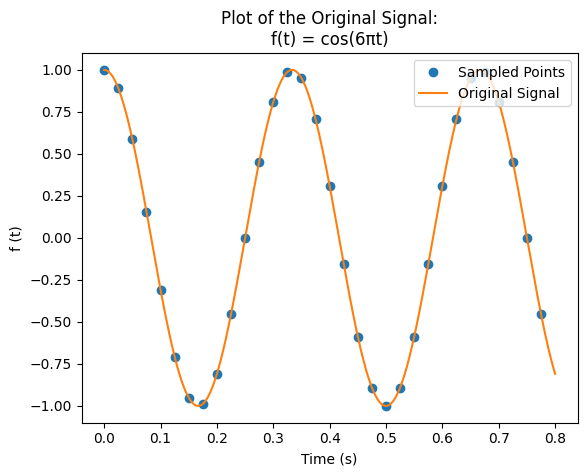

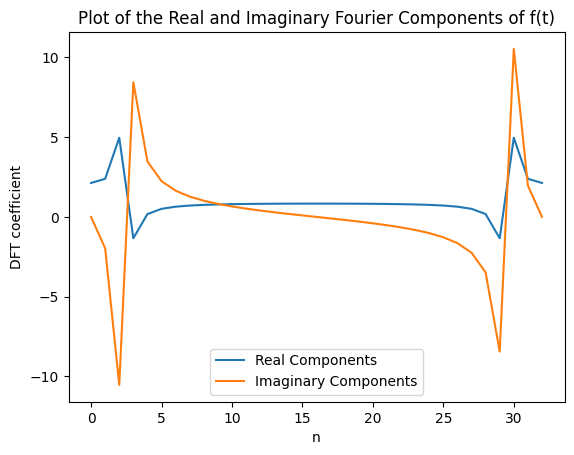

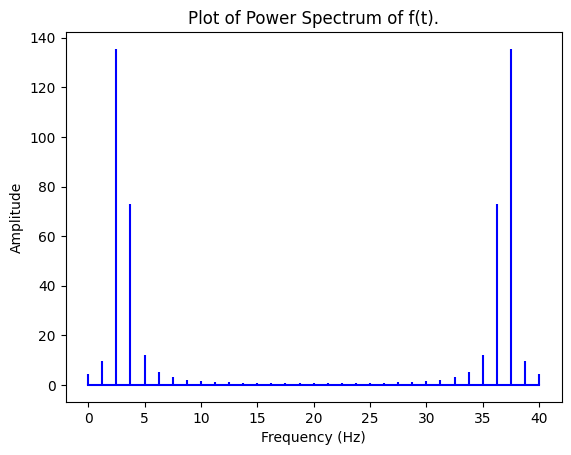

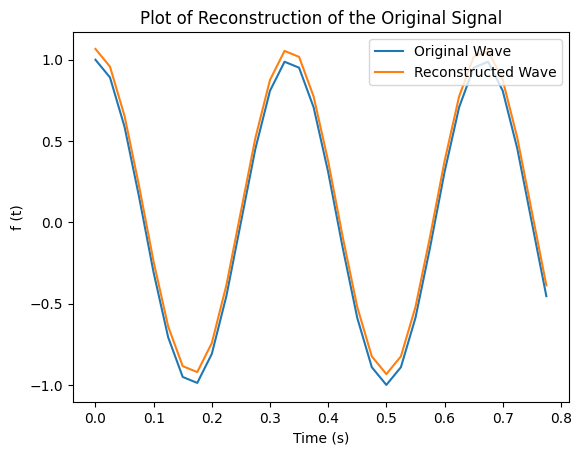

In [2]:
#f(t) = cos(6πt)

import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.fft import fft, ifft

def function(t): #f(t) = cos(6πt)
    return np.cos(6*math.pi*t)

#this function undergoes the "signal reconstruction" process. Using Eq (26) from lab manual
def reconstruction(Re_list, Im_list, m, n, time_sampling):
    signal = []
    for i in m:
        r = 0
        for j in n:
            r = r + (1/N*(Re_list[j] * math.cos((2*math.pi*j*i)/N) + Im_list[j] * math.sin((2*math.pi*j*i)/N))) #Eq (26) summation
        signal.append(r)
    return(signal)

#initializing parameters and lists
N = 32
#h = 0.6 #used when time spacing is desired to be 0.6
#h = 0.5 #used when time spacing is desired to be 0.5
#h = 0.4 #used when time spacing is desired to be 0.4
#h = 0.1 #used when time spacing is desired to be 0.1
h = 0.025 #used when time spacing is desired to be 0.01
tau = N*h
n = np.arange(0,N+1,1)
m = np.arange(0,N,1)
time_sampling = np.arange(0, tau, h)
time_proper = np.linspace(0,tau,1000)
Re_list = []
Im_list = []

#prints the period and frequency based on given N and h
print('Time (in secs): ', tau)
print('Frequency (in Hz): %0.5f \n\n'%(1/tau))

#this nested loop is creating a list of all the Real and Imaginary components. Using Eq (24) and (25) from lab manual.
for i in n: 
    sum_r = 0
    sum_i = 0
    for j in m:
        sum_r = sum_r + function(j*h)*math.cos((2*math.pi*j*i)/N) #Eq (24) summation
        sum_i = sum_i + function(j*h)*math.sin((2*math.pi*j*i)/N) #Eq (25) summation
    Re_list.append(sum_r)
    Im_list.append(sum_i)
    
#using the reconstruction function above, we reconstruct the signal.
r = reconstruction(Re_list, Im_list, m, n, time_sampling)

#this plots original signal over t = [0,m*h]
plt.figure()
plt.plot(time_sampling, function(time_sampling), 'o')
plt.plot(time_proper, function(time_proper))
plt.xlabel('Time (s)')
plt.ylabel("f (t)")
plt.title("Plot of the Original Signal:\nf(t) = cos(6πt)")
plt.legend(['Sampled Points', 'Original Signal'], loc='upper right')

#this plots Real Components vs. n and Imaginary Components vs. n
plt.figure()
plt.plot(n, Re_list)
plt.plot(n, Im_list)
plt.xlabel("n")
plt.ylabel("DFT coefficient")
plt.legend(['Real Components','Imaginary Components'])
plt.title("Plot of the Real and Imaginary Fourier Components of f(t)")

#this plots Power Spectrum of signal
plt.figure()
plt.stem(n/tau, np.asarray(Re_list)**2 + np.asarray(Im_list)**2,'b-', markerfmt=" ", basefmt="-b")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title ("Plot of Power Spectrum of f(t).")

#this plots the original signal and the reconstructed signal
plt.figure()
plt.plot(m*h, function(time_sampling))
plt.plot(m*h, r)
plt.xlabel("Time (s)")
plt.ylabel("f (t)")
plt.title ("Plot of Reconstruction of the Original Signal")
plt.legend(['Original Wave','Reconstructed Wave'],loc='upper right')
plt.show()